In [0]:
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow import keras

# set the random seeds to make sure your results are reproducible
from numpy.random import seed

seed(1)
from tensorflow import set_random_seed

set_random_seed(1)

cifar10 = keras.datasets.cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

print(X_train.shape)

(50000, 32, 32, 3)


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Preprocess Training Data:
Training:
Epoch 1/40
50000/50000 [==============================] - 9s 180us/sample - loss: 1.7103 - acc: 0.3751
Epoch 2/40
50000/50000 [==============================] - 5s 102us/sample - loss: 1.3352 - acc: 0.5237
Epoch 3/40
50000/50000 [==============================] - 5s 103us/sample - loss: 1.1880 - acc: 0.5780
Epoch 4/40
50000/50000 [==============================] - 5s 105us/sample - loss: 1.0954 - acc: 0.6151
Epoch 5/40
50000/50000 [==============================] - 5s 105us/sample - loss: 1.0272 - acc: 0.6385
Epoch 6/40
50000/50000 [==============================] - 5s 104us/sample - loss: 0.9678 - acc: 0.6608
Epoch 7/40
50000/50000 [==============================] - 5s 104us/sample - loss: 0.9215 - acc: 0.6755
Epoch 8/40
50000/50000 [==============================] 

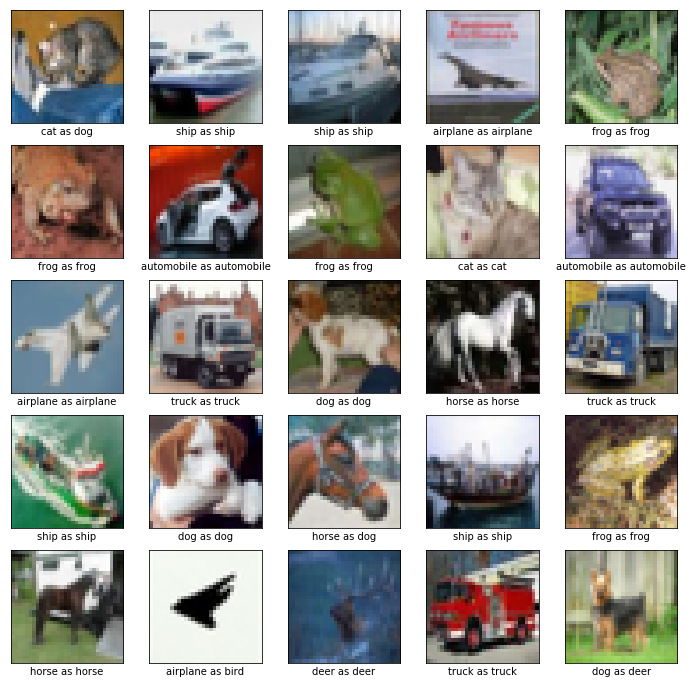

In [0]:
# Create model Model 1 
model = keras.models.Sequential(
    [keras.layers.Conv2D(64, (3, 3), padding='same', activation=tf.nn.relu, input_shape=(32, 32, 3)),
     keras.layers.MaxPooling2D(2, 2),
     keras.layers.Dropout(0.25),
     keras.layers.Conv2D(128, kernel_size=(3, 3), activation=tf.nn.relu),
     keras.layers.Dropout(0.4),
     keras.layers.Flatten(),
     keras.layers.Dense(128, activation=tf.nn.relu),
     keras.layers.Dropout(0.4),
     keras.layers.Dense(10, activation=tf.nn.softmax)])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

print('Preprocess Training Data:')
X_train = X_train / 255.0

print('Training:')
model.fit(X_train, y_train, batch_size=250, epochs=40)

print('Preprocess Testing Data:')
X_test = X_test / 255.0
print('Testing:')
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:{}, Test Loss:{} '.format(test_acc, test_loss))

print("Predicting the class for some sample test data:")
prob_result = model.predict(X_test[0:25])
class_result = prob_result.argmax(axis=-1)
print(class_result.shape)
plt.figure("CFAR10 sample test results", figsize=(12, 12))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i])
    label = '{} as {}'.format(class_names[y_test[i, 0]], class_names[class_result[i]])
    plt.xlabel(label)
plt.show()

Preprocess Training Data:
Training:
Epoch 1/70
50000/50000 [==============================] - 8s 157us/sample - loss: 1.7499 - acc: 0.4049
Epoch 2/70
50000/50000 [==============================] - 7s 140us/sample - loss: 1.2454 - acc: 0.5587
Epoch 3/70
50000/50000 [==============================] - 7s 136us/sample - loss: 1.0445 - acc: 0.6310
Epoch 4/70
50000/50000 [==============================] - 7s 138us/sample - loss: 0.9186 - acc: 0.6767
Epoch 5/70
50000/50000 [==============================] - 7s 140us/sample - loss: 0.8417 - acc: 0.7046
Epoch 6/70
50000/50000 [==============================] - 7s 137us/sample - loss: 0.7783 - acc: 0.7272
Epoch 7/70
50000/50000 [==============================] - 7s 138us/sample - loss: 0.7216 - acc: 0.7484
Epoch 8/70
50000/50000 [==============================] - 7s 141us/sample - loss: 0.6786 - acc: 0.7629
Epoch 9/70
50000/50000 [==============================] - 7s 146us/sample - loss: 0.6352 - acc: 0.7796
Epoch 10/70
50000/50000 [============

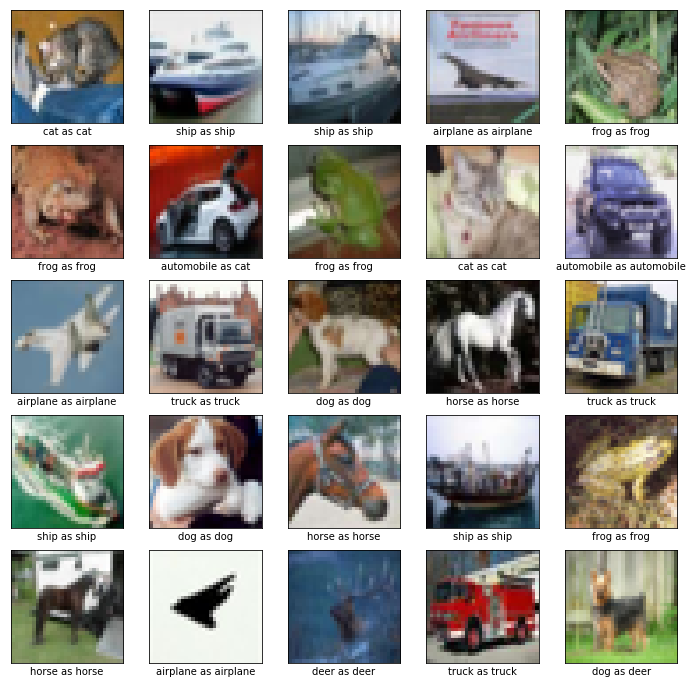

In [0]:
# Create model 2 with batch normalizationa and dropout
model1 = keras.models.Sequential(
    [keras.layers.Conv2D(32, (3, 3), padding='same', activation=tf.nn.relu, input_shape=(32, 32, 3)),
     keras.layers.BatchNormalization(),
     keras.layers.Conv2D(32, (3, 3) , activation=tf.nn.relu),
     keras.layers.BatchNormalization(),
     keras.layers.MaxPooling2D(2, 2),
     keras.layers.Dropout(0.25),
     keras.layers.Conv2D(64, kernel_size=(3, 3), activation=tf.nn.relu),
     keras.layers.BatchNormalization(),
     keras.layers.Dropout(0.25),
     keras.layers.Conv2D(128, kernel_size=(3, 3), activation=tf.nn.relu),
     keras.layers.BatchNormalization(),
     keras.layers.MaxPooling2D(2, 2),
     keras.layers.Dropout(0.25),
     keras.layers.Flatten(),
     keras.layers.Dense(512, activation=tf.nn.relu),
     keras.layers.BatchNormalization(),
     keras.layers.Dropout(0.4),
     keras.layers.Dense(128, activation=tf.nn.relu),
     keras.layers.BatchNormalization(),
     keras.layers.Dropout(0.4),
     keras.layers.Dense(10, activation=tf.nn.softmax)])
model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

print('Preprocess Training Data:')
X_train = X_train / 255.0

print('Training:')

model1.fit(X_train, y_train, batch_size=250, epochs=70)

print('Preprocess Testing Data:')
X_test = X_test / 255.0
print('Testing:')
test_loss, test_acc = model1.evaluate(X_test, y_test)
print('Test accuracy:{}, Test Loss:{} '.format(test_acc, test_loss))

print("Predicting the class for some sample test data:")
prob_result = model1.predict(X_test[0:25])
class_result = prob_result.argmax(axis=-1)
print(class_result.shape)
plt.figure("CFAR10 sample test results", figsize=(12, 12))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i])
    label = '{} as {}'.format(class_names[y_test[i, 0]], class_names[class_result[i]])
    plt.xlabel(label)
plt.show()

Preprocess Training Data:
Training:
Epoch 1/40
50000/50000 [==============================] - 6s 115us/sample - loss: 2.3028 - acc: 0.0987
Epoch 2/40
50000/50000 [==============================] - 5s 108us/sample - loss: 2.3027 - acc: 0.1010
Epoch 3/40
50000/50000 [==============================] - 5s 107us/sample - loss: 2.3027 - acc: 0.0963
Epoch 4/40
50000/50000 [==============================] - 5s 108us/sample - loss: 2.3027 - acc: 0.0994
Epoch 5/40
50000/50000 [==============================] - 5s 107us/sample - loss: 2.3027 - acc: 0.0969
Epoch 6/40
50000/50000 [==============================] - 5s 108us/sample - loss: 2.3026 - acc: 0.0973
Epoch 7/40
50000/50000 [==============================] - 5s 110us/sample - loss: 2.3026 - acc: 0.0984
Epoch 8/40
50000/50000 [==============================] - 5s 109us/sample - loss: 2.3027 - acc: 0.0976
Epoch 9/40
50000/50000 [==============================] - 5s 106us/sample - loss: 2.3027 - acc: 0.0964
Epoch 10/40
50000/50000 [============

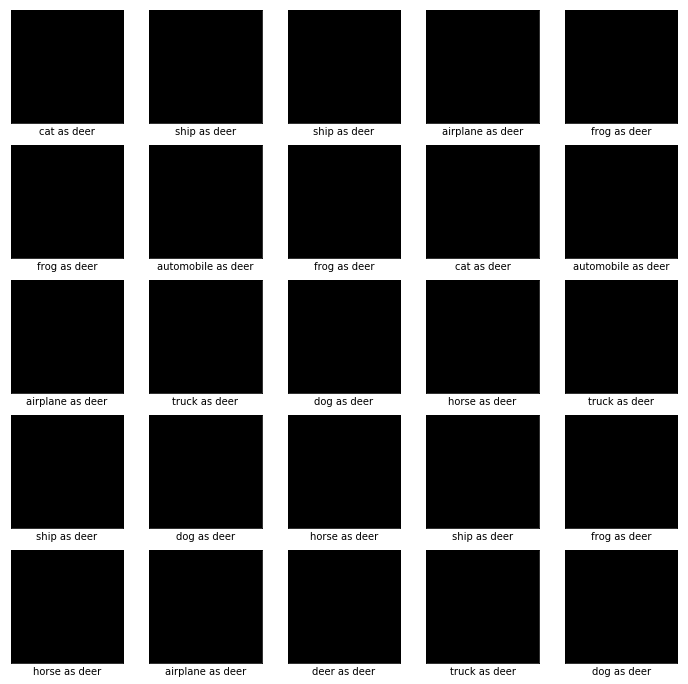

In [0]:
# Create model Model 1 
model = keras.models.Sequential(
    [keras.layers.Conv2D(64, (3, 3), padding='same', activation=tf.nn.relu, input_shape=(32, 32, 3)),
     keras.layers.MaxPooling2D(2, 2),
     keras.layers.Dropout(0.25),
     keras.layers.Conv2D(128, kernel_size=(3, 3), activation=tf.nn.relu),
     keras.layers.Dropout(0.4),
     keras.layers.Conv2D(256, kernel_size=(3, 3), activation=tf.nn.relu),
     keras.layers.MaxPooling2D(2, 2),
     keras.layers.Dropout(0.4),
     keras.layers.Flatten(),
     keras.layers.Dense(128, activation=tf.nn.relu),
     keras.layers.Dropout(0.4),
     keras.layers.Dense(10, activation=tf.nn.softmax)])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

print('Preprocess Training Data:')
X_train = X_train / 255.0

print('Training:')
model.fit(X_train, y_train, batch_size=250, epochs=40)

print('Preprocess Testing Data:')
X_test = X_test / 255.0
print('Testing:')
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:{}, Test Loss:{} '.format(test_acc, test_loss))

print("Predicting the class for some sample test data:")
prob_result = model.predict(X_test[0:25])
class_result = prob_result.argmax(axis=-1)
print(class_result.shape)
plt.figure("CFAR10 sample test results", figsize=(12, 12))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i])
    label = '{} as {}'.format(class_names[y_test[i, 0]], class_names[class_result[i]])
    plt.xlabel(label)
plt.show()